In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.formula.api as smf

In [3]:
## 8. This question involves the use of simple linear regression on the Auto  data set.
### (a) Use the lm() function to perform a simple linear regression with  mpg as the response and 
# horsepower as the predictor. Use the  summary() function to print the results.

auto = pd.read_csv('/home/abhishek/Desktop/ISLR-Applied-Exercises-in-Python/data/Auto.csv')
print(auto.shape)

auto.head()

(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [5]:
# horsepower is of type object, it needs to be int/float for a regression fit

auto['horsepower'] = auto['horsepower'].replace('?', np.nan)
auto.dropna(inplace=True)

In [6]:
auto['horsepower'] = auto['horsepower'].astype(np.float32)

In [7]:
result = smf.ols('mpg ~ horsepower',data = auto).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           7.03e-81
Time:                        10:34:04   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [8]:
# i. Is there a relationship between the predictor and the response?

# Since there is a non-negative coefficient, there is a relationship between predictor and response

In [9]:
# ii. How strong is the relationship between the predictor and the response?

# we can measure the overall fit by R^2 value, since R^2 value s 0.60, we can say that 60% of the variablity
# is explained by the predictor

In [10]:
# iii. Is the relationship between the predictor and the response positive or negative?

# the value of the coefficient is -0.1578, hence the relationship is negative.

In [12]:
# (iv) What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

lin_reg = LinearRegression().fit(auto['horsepower'].to_frame(), auto['mpg'])
lin_reg.predict(pd.Series([98]).to_frame())


array([24.4670769])

In [13]:
def get_prediction_intervals(prediction, y_test, test_predictions, pi=.95):
    '''
    Get prediction intervals for linear regression
    '''
    
    # get standard deviation of y_test
    sum_errs = np.sum((y_test - test_predictions)**2)
    stddev = np.sqrt(1 / (len(y_test) - 2) * sum_errs )
    
    # get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stddev
    
    # generate prediction interval lower and upper bound
    lower, upper = prediction-interval, prediction+interval
    
    return lower, prediction, upper

In [15]:
# (b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.


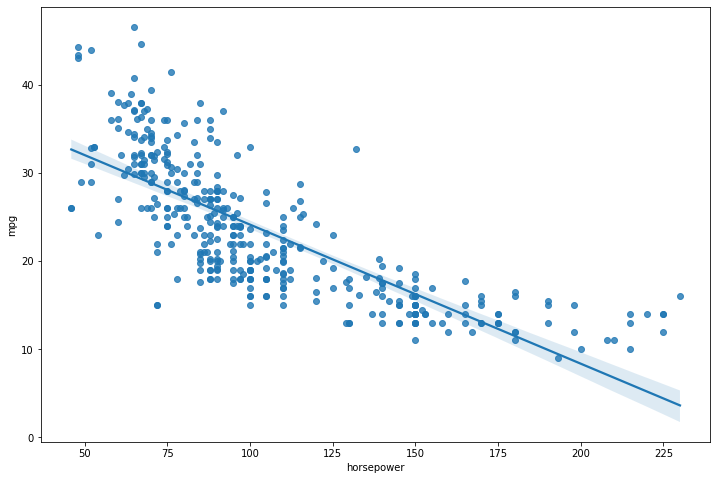

In [16]:
plt.figure(figsize = (12,8))
sns.regplot(auto['horsepower'], auto['mpg'])


In [20]:
# (c) Use the plot() function to produce diagnostic plots of the least squares regression fit. 
# Comment on any problems you see with the fit.

import statsmodels.graphics.api as smg

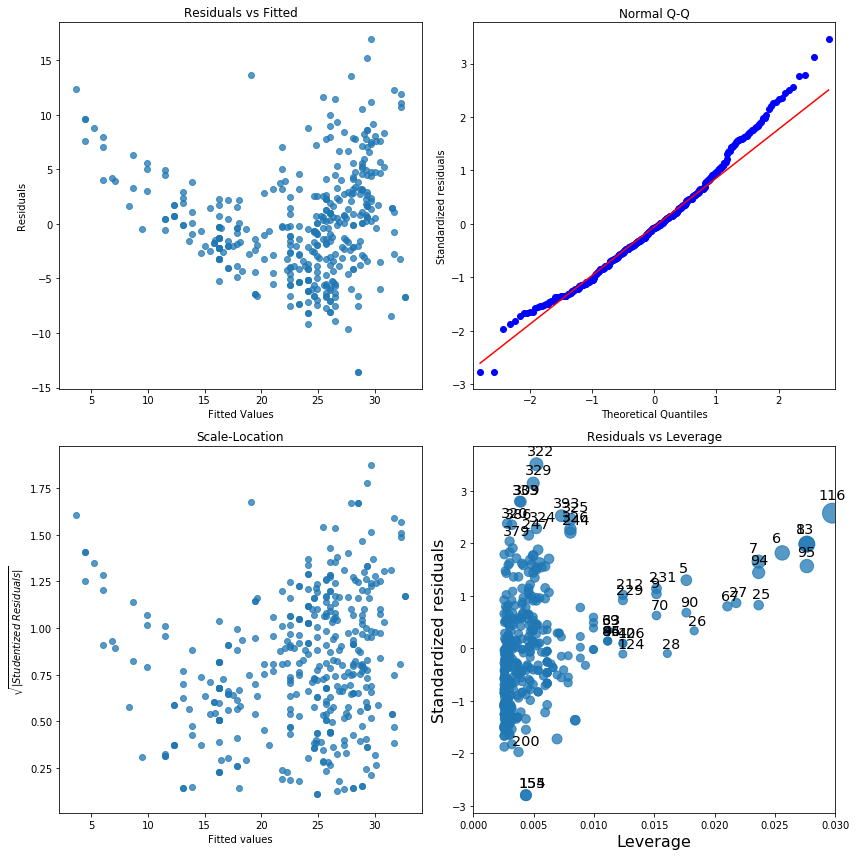

In [22]:
# You ran a linear regression analysis and the stats software spit out a bunch of numbers. 
# The results were significant (or not). You might think that you’re done with analysis. 
# No, not yet. After running a regression analysis, you should check if the model works well for data.

# We can check if a model works well for data in many different ways. 
# We pay great attention to regression results, such as slope coefficients, p-values, or R2 that 
# tell us how well a model represents given data. That’s not the whole picture though. Residuals 
# could show how poorly a model represents data. Residuals are leftover of the outcome variable after 
# fitting a model (predictors) to data and they could reveal unexplained patterns in the data by the 
# fitted model. Using this information, not only could you check if linear regression assumptions are 
# met, but you could improve your model in an exploratory way.

# The diagnostic plots show residuals in four different ways.
# 1. Residuals vs Fitted
# 2. Normal Q-Q
# 3. Scale-Location
# 4. Residuals vs Leverage

# Diagnostic plots
infl = result.get_influence()
fig, ax = plt.subplots(2, 2, figsize = (12, 12))

# 1. Residuals vs fitted values
ax1 = plt.subplot(221)
plt.scatter(result.fittedvalues, result.resid, alpha=0.75)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# 2. Normal Q-Q plot
ax2 = plt.subplot(222)
smg.qqplot(infl.resid_studentized_internal, line='q', ax=ax2)
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized residuals')

# 3. Square root absolute standardized residuals vs fitted values
ax3 = plt.subplot(223)
plt.scatter(result.fittedvalues, np.sqrt(np.absolute(infl.resid_studentized_external)), alpha = 0.75)
plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel(r'$\sqrt{|Studentized\ Residuals|}$')

# 4. Standardized residuals vs Leverage residuals
ax4 = plt.subplot(224)
smg.influence_plot(result, size=20, ax=ax4)
plt.xlim(0, 0.03)
plt.xlabel('Leverage')
plt.ylabel('Standardized residuals')
plt.title('Residuals vs Leverage')

plt.tight_layout()
plt.show()